# FLIGHT PRICE PREDICTION

### Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 

1. Time of purchase patterns (making sure last-minute purchases are expensive) 

2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) 

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

#### Importing necessary Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("Flight price Dataset.csv")
df

Unnamed: 0   Airline     Source Destination Dep_Time Arrival_Time  \
0              0  SpiceJet  New Delhi      Mumbai    18:55        21:05   
1              1  SpiceJet  New Delhi      Mumbai    07:20        09:35   
2              2  SpiceJet  New Delhi      Mumbai    19:45        22:05   
3              3  Air Asia  New Delhi      Mumbai    13:00        18:20   
4              4  Air Asia  New Delhi      Mumbai    08:00        14:05   
...          ...       ...        ...         ...      ...          ...   
1913        1913    IndiGo    Kolkata     Chennai    12:05        18:30   
1914        1914    IndiGo    Kolkata     Chennai    05:40        12:10   
1915        1915    IndiGo    Kolkata     Chennai    08:40        15:55   
1916        1916    IndiGo    Kolkata     Chennai    12:05        19:40   
1917        1917    IndiGo    Kolkata     Chennai    04:30        12:10   

     Duration Total_Stops Additional_Info Price (in ₹)  
0      2h 10m    Non Stop         No info        5,950  
1      2h 15m    Non Stop         No info        5,950  
2      2h 20m    Non Stop         No info        5,950  
3      5h 20m      1 Stop         No info        5,950  
4      6h 05m      1 Stop             NaN        5,950  
...       ...         ...             ...          ...  
1913   6h 25m      1 Stop         No info        6,507  
1914   6h 30m      1 Stop         No info        6,507  
1915   7h 15m      1 Stop         No info        6,507  
1916   7h 35m      1 Stop         No info        6,507  
1917   7h 40m      1 Stop         No info        6,507  

[1918 rows x 10 columns]

Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 1918 rows and 10 columns present in our dataframe. In the above cell we can see our dataset includes a target label "Price" column and the remaining feature columns can be used to determine or help in predicting the price of the flights for different places. Since price is a continous value it makes this to be a Regression problem!

## Exploratory Data Analysis (EDA)

In [3]:
# To display maximum columns in the dataset
pd.set_option("display.max_columns",None)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

Removed unwanted column "Unnamed: 0" from the dataset since it was only storing the index data and was not a worthy feature column for prediction. 

In [5]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(10)

We have 1918 Rows and 9 Columns in our dataframe


Airline     Source Destination Dep_Time Arrival_Time Duration Total_Stops  \
0  SpiceJet  New Delhi      Mumbai    18:55        21:05   2h 10m    Non Stop   
1  SpiceJet  New Delhi      Mumbai    07:20        09:35   2h 15m    Non Stop   
2  SpiceJet  New Delhi      Mumbai    19:45        22:05   2h 20m    Non Stop   
3  Air Asia  New Delhi      Mumbai    13:00        18:20   5h 20m      1 Stop   
4  Air Asia  New Delhi      Mumbai    08:00        14:05   6h 05m      1 Stop   
5  Air Asia  New Delhi      Mumbai    07:20        18:20  11h 00m      1 Stop   
6  Air Asia  New Delhi      Mumbai    09:35        20:40  11h 05m      1 Stop   
7  Go First  New Delhi      Mumbai    07:00        09:10   2h 10m    Non Stop   
8  Go First  New Delhi      Mumbai    14:20        16:35   2h 15m    Non Stop   
9  Go First  New Delhi      Mumbai    21:00        23:15   2h 15m    Non Stop   

  Additional_Info Price (in ₹)  
0         No info        5,950  
1         No info        5,950  
2         No info        5,950  
3         No info        5,950  
4             NaN        5,950  
5             NaN        5,950  
6         No info        5,950  
7             NaN        5,953  
8             NaN        5,953  
9         No info        5,953

**Column Description:**

- Airline : This shows the list of all the Airline Names for which the data got scraped
- Source : Gives us the name of the source place where the flight journey began
- Destination : Shows us the name of the destination place where the flight journey ended
- Dep_Time : In this column we have the timings of every flight departure
- Arrival_Time : Here in this column we have the timings of every flight arrival
- Duration : We can see the total duration of a flight that it took to fly from the source to the destination
- Total_Stops : Lists the number of stops the flight is going to take to complete the entire journey
- Additional_Info : Provides us with any additional information like type of meal that the passenger is eligible for
- Price : Finally we have our label column that has the ticket prices for the aircraft journey

In [6]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price (in ₹)'],
      dtype='object')


In [7]:
df.nunique().sort_values().to_frame("Unique Values")

Unique Values
Total_Stops                  2
Additional_Info              3
Airline                      8
Source                       8
Destination                 23
Duration                   116
Price (in ₹)               178
Arrival_Time               207
Dep_Time                   210

With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns of our dataset.

In [8]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1918 non-null   object
 1   Source           1918 non-null   object
 2   Destination      1918 non-null   object
 3   Dep_Time         1918 non-null   object
 4   Arrival_Time     1918 non-null   object
 5   Duration         1918 non-null   object
 6   Total_Stops      1918 non-null   object
 7   Additional_Info  1685 non-null   object
 8   Price (in ₹)     1918 non-null   object
dtypes: object(9)
memory usage: 135.0+ KB


The above dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

In [9]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('-'*80)

IndiGo          949
Air Asia        229
Go First        224
Vistara         216
Air India       140
SpiceJet        132
Alliance Air     22
FlyBig            6
Name: Airline, dtype: int64
--------------------------------------------------------------------------------
New Delhi    612
Mumbai       419
Bangalore    276
Hyderabad    272
Kolkata      271
Pune          34
Patna         18
Chennai       16
Name: Source, dtype: int64
--------------------------------------------------------------------------------
Chennai          230
New Delhi        230
Bangalore        169
Mumbai           161
Kolkata          128
Goa              125
Hyderabad        124
Jaipur           108
Pune              90
Ahmedabad         82
Varanasi          74
Srinagar          68
Guwahati          67
Dehradun          52
Patna             45
Chandigarh        40
Leh               30
Kochi             25
Visakhapatnam     24
Tirupati          21
Port Blair        12
Lucknow            8
Bagdogra           5
Name

Column 'Additional_info' having data related to meal availibility, so let's rename this column.

In [10]:
df.rename(columns = {"Additional_Info": "Meal_Availability"},inplace = True)

In [11]:
df.rename(columns={df.columns[8]:'Price'}, inplace=True) #Renaming the Price column to remove the Rupees symbol

In [12]:
# Checking for null values
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Meal_Availability    233
Price                  0
dtype: int64

We can see some null values on 'Meal_Availability' column, let's fill the null values with mode method as this is a catagorical column.

In [13]:
df["Meal_Availability"] = df["Meal_Availability"].fillna(df["Meal_Availability"].mode()[0])

In [14]:
# Checking for null values after imputing
df.isnull().sum()

Airline              0
Source               0
Destination          0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Meal_Availability    0
Price                0
dtype: int64

<AxesSubplot:>

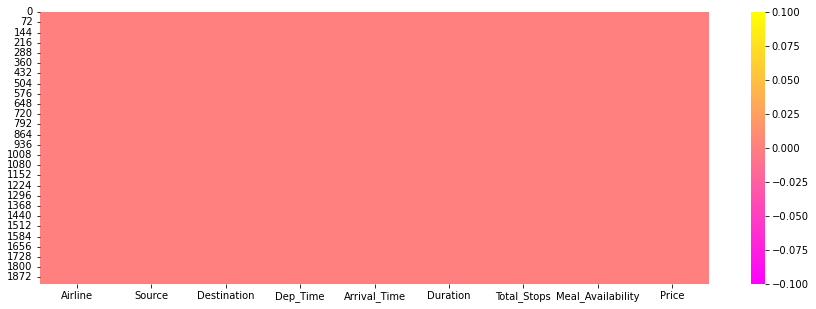

In [15]:
# Let's visualize the null values clearly through Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap="spring")

#### Total_Stops

In [16]:
# Total_Stops

df.Total_Stops.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2}, 
                           inplace = True)
df["Total_Stops"].value_counts()

0    1421
1     497
Name: Total_Stops, dtype: int64

Now we are changing the object datatype "Total_Stops" column to integer values by giving them the numeric stops values instead of a descriptive one.

In [17]:
# Converting columns from object type to Datetime Type
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

#### Duration

In [18]:
#Extracting Duration column using Time_of_arrival and Departure_Time
Difference = (df["Arrival_Time"]-df["Dep_Time"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600  # Converting difference into seconds and Dividing it by 3600 (1hr=3600seconds)
    Diff_list.append(duration)
df["Duration"] = Diff_list

#### Departure_time

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [19]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
df["Departure_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
df["Departure_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [20]:
# Dropping Departure_time column
df.drop("Dep_Time",axis=1,inplace=True)

#### Arrival_Time

Similarly we can extract hours and minutes from Arrival_Time column and dropping Arrival_Time column.

In [21]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time column
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

#### Price

The target column should be in continuous numeric data type but it is appearing as object data type due to some categorical sign ",". Let's replace this sign by empty space and convert the type into float.

In [22]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

In [23]:
# Checking dataset again
df

Airline     Source Destination  Duration  Total_Stops  \
0     SpiceJet  New Delhi      Mumbai  2.166667            0   
1     SpiceJet  New Delhi      Mumbai  2.250000            0   
2     SpiceJet  New Delhi      Mumbai  2.333333            0   
3     Air Asia  New Delhi      Mumbai  5.333333            1   
4     Air Asia  New Delhi      Mumbai  6.083333            1   
...        ...        ...         ...       ...          ...   
1913    IndiGo    Kolkata     Chennai  6.416667            1   
1914    IndiGo    Kolkata     Chennai  6.500000            1   
1915    IndiGo    Kolkata     Chennai  7.250000            1   
1916    IndiGo    Kolkata     Chennai  7.583333            1   
1917    IndiGo    Kolkata     Chennai  7.666667            1   

     Meal_Availability   Price  Departure_Hour  Departure_Min  Arrival_Hour  \
0              No info  5950.0              18             55            21   
1              No info  5950.0               7             20             9   
2              No info  5950.0              19             45            22   
3              No info  5950.0              13              0            18   
4              No info  5950.0               8              0            14   
...                ...     ...             ...            ...           ...   
1913           No info  6507.0              12              5            18   
1914           No info  6507.0               5             40            12   
1915           No info  6507.0               8             40            15   
1916           No info  6507.0              12              5            19   
1917           No info  6507.0               4             30            12   

      Arrival_Min  
0               5  
1              35  
2               5  
3              20  
4               5  
...           ...  
1913           30  
1914           10  
1915           55  
1916           40  
1917           10  

[1918 rows x 11 columns]

In [24]:
# Let's check the data types of the columns
df.dtypes

Airline               object
Source                object
Destination           object
Duration             float64
Total_Stops            int64
Meal_Availability     object
Price                float64
Departure_Hour         int64
Departure_Min          int64
Arrival_Hour           int64
Arrival_Min            int64
dtype: object

In [25]:
# Statistical summary of dataset
df.describe()

Duration  Total_Stops         Price  Departure_Hour  Departure_Min  \
count  1918.000000  1918.000000   1918.000000     1918.000000    1918.000000   
mean      3.551269     0.259124   6083.191867       11.279979      25.612617   
std       2.902290     0.438268   1632.658575        5.584120      17.651722   
min       0.750000     0.000000   1496.000000        0.000000       0.000000   
25%       1.833333     0.000000   5103.000000        7.000000      10.000000   
50%       2.333333     0.000000   5955.000000       10.000000      25.000000   
75%       4.166667     1.000000   7413.000000       16.000000      40.000000   
max      18.333333     1.000000  11542.000000       22.000000      55.000000   

       Arrival_Hour  Arrival_Min  
count   1918.000000  1918.000000  
mean      14.781022    28.626173  
std        5.425169    16.912968  
min        1.000000     0.000000  
25%       10.000000    15.000000  
50%       15.000000    30.000000  
75%       20.000000    45.000000  
max       23.000000    55.000000

This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.



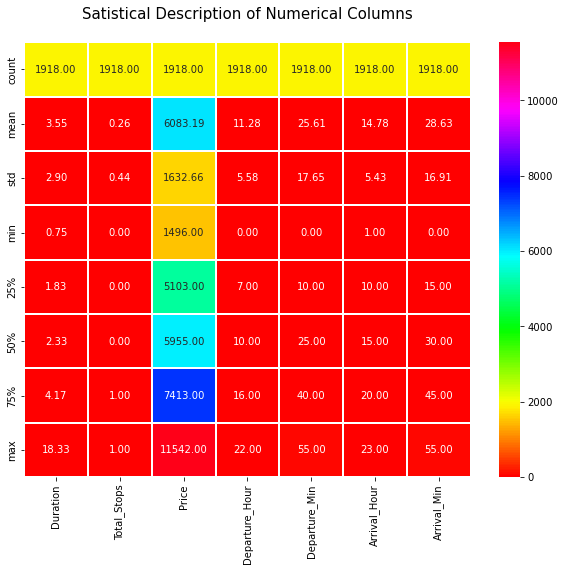

In [26]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hsv")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

In [27]:
# Separating numerical and categorcal columns in the dataset

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns present in the dataset are:\n",categorical_col)

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("\nNumerical columns present in the dataset are:\n",numerical_col)

Categorical columns present in the dataset are:
 ['Airline', 'Source', 'Destination', 'Meal_Availability']

Numerical columns present in the dataset are:
 ['Duration', 'Total_Stops', 'Price', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


## Data Visualization

In [28]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

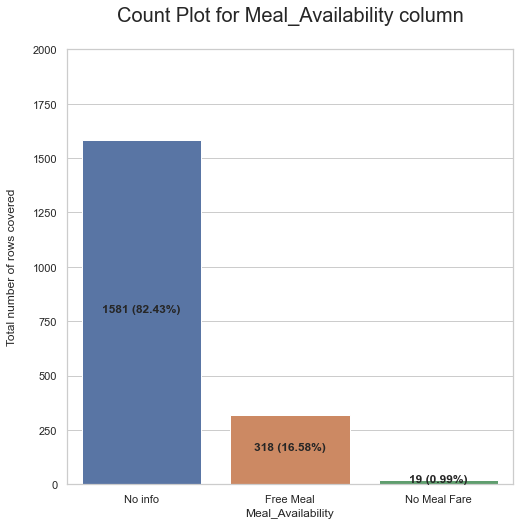

In [29]:
sns.set(style="whitegrid")

try:
    x = 'Meal_Availability'
    k=0
    plt.figure(figsize=[8,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

From above plot we can see 82.43% cases there is no info of meal, so we can say free meal will not be provided.

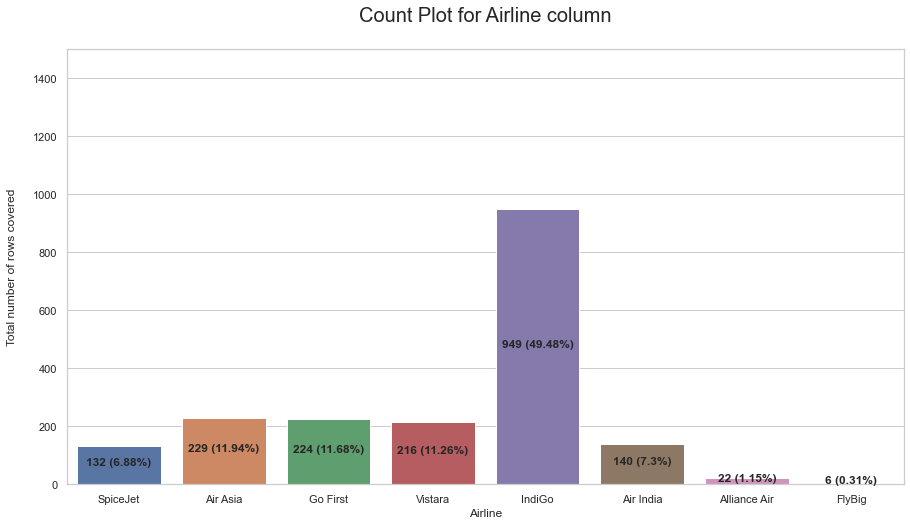

In [30]:
try:
    x = 'Airline'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,1500)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Highest number of airline preferred by people are Indigo covering 49.48% of the total record. Air Asia, Go First and Vistara and similar in range. FlyBig has the lowest numbers.

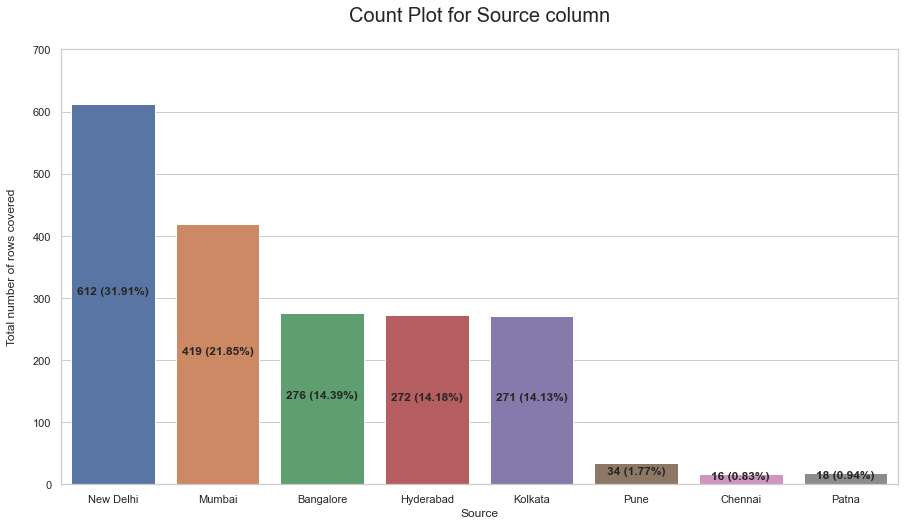

In [31]:
try:
    x = 'Source'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,700)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

- The departure area or source place highly used or people majorly flying from the city is "New Delhi" covering 31.91% record in the column
- We see that "Mumbai" is a close second wherein it covers 21.85% records in the column
- Other two famous locations where people chose to fly from are "Bangalore", "Hyderabad" and "Kolkata" 
- The least travel from location is "Chennai"

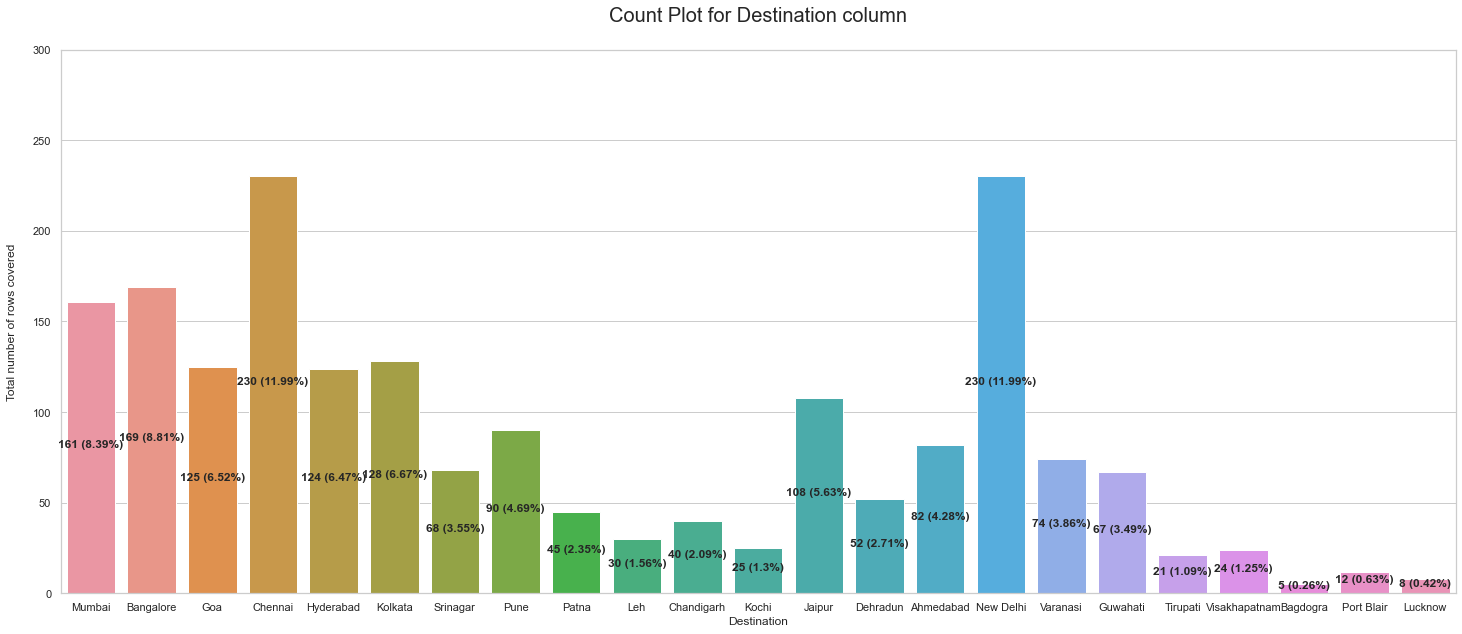

In [32]:
try:
    x = 'Destination'
    k=0
    plt.figure(figsize=[25,10])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,300)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Chennai and New Delhi has the same no of flights as destination.

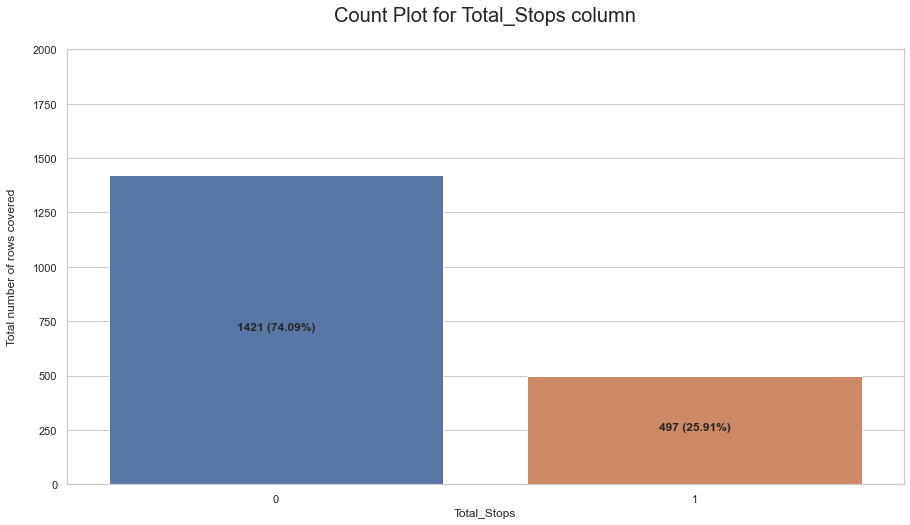

In [33]:
try:
    x = 'Total_Stops'
    k=0
    plt.figure(figsize=[15,8])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,2000)
    plt.title(f'Count Plot for {x} column\n', fontsize = 20)
    plt.ylabel(f'Total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Majority of the cases, evey one flies with direct flight and followed by 1 stop flight. No one prefers flight with more than 1 stop.

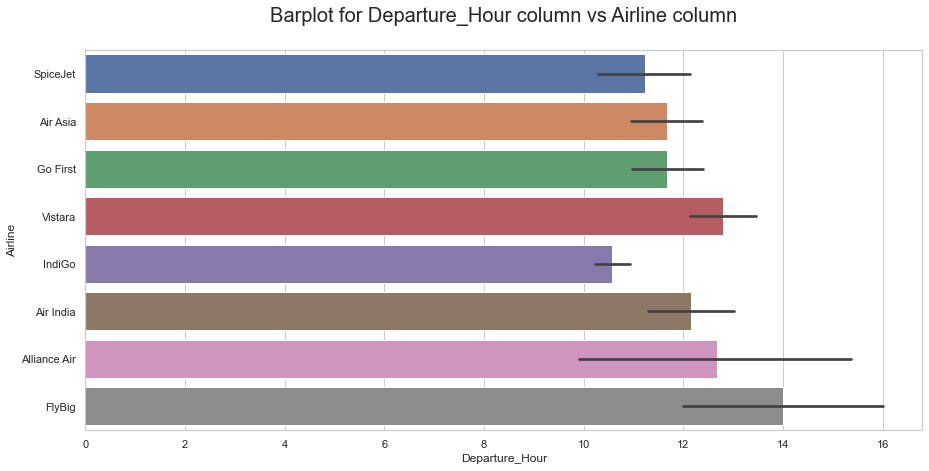

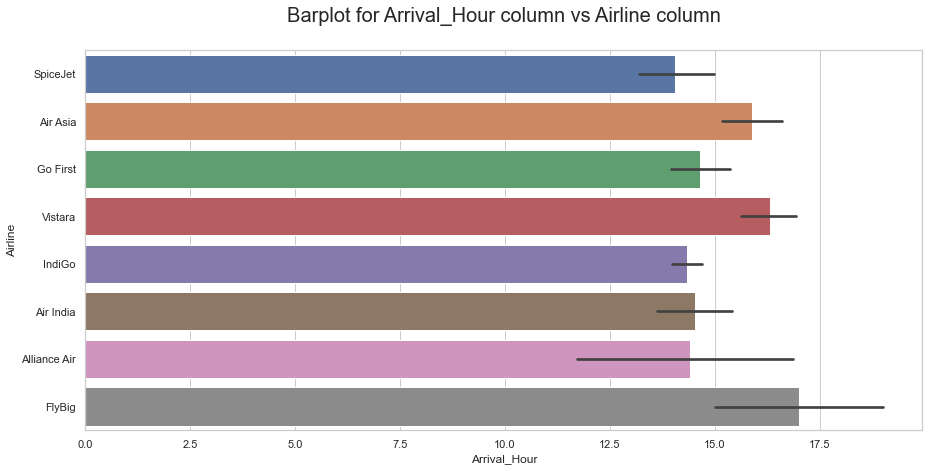

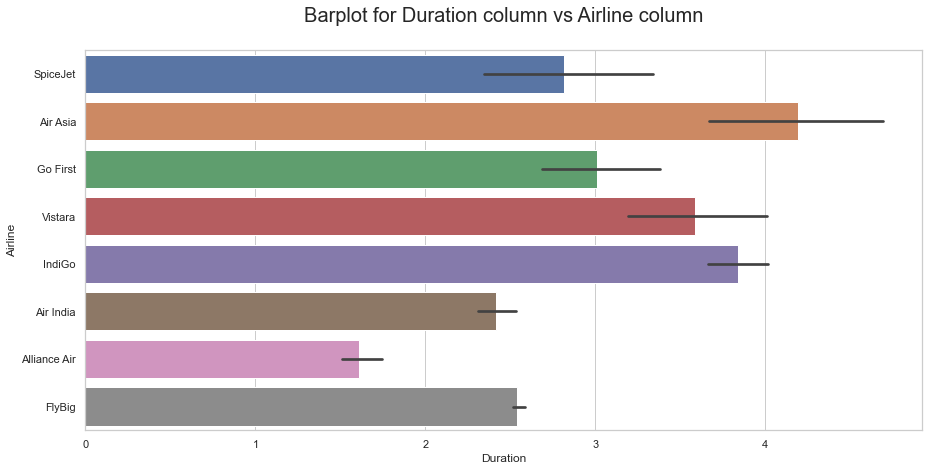

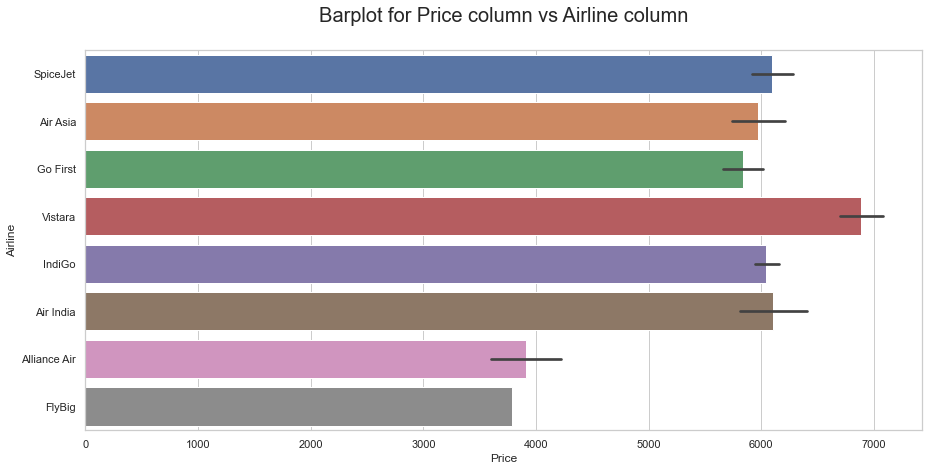

In [34]:
y = 'Airline'

x = 'Departure_Hour'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Arrival_Hour'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Duration'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = 'Price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

- When we observe the barplot for Departure hour vs Airline we can see that FlyBig has the highest departure time while IndiGo has the lowest departure time
- Considering the barplot for Arrival time vs Airline we can see that FlyBig has the highest arrival time while Vistara have the lowest arrival time
- Taking a look at the barplot for Flight duration vs Airline we observe that Ai Asia has the highest flight duration while Alliance Air has the lowest flight duration collectively
- Comparing the barplots for Flight prices vs Airline we can clearly see that Vistara have very high flight prices while the FlyBig has the lowest fare

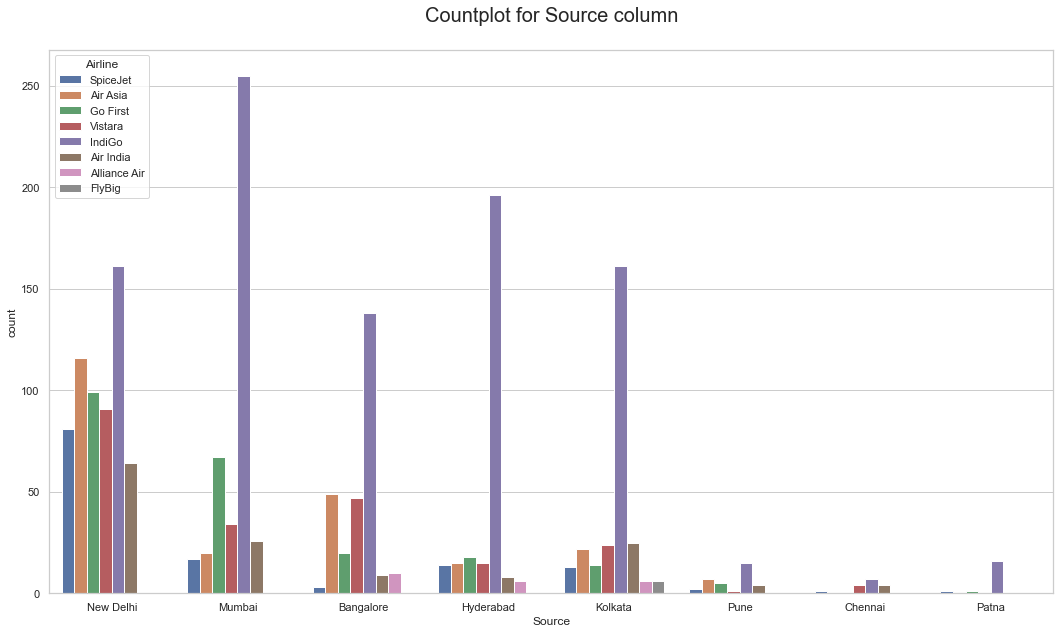

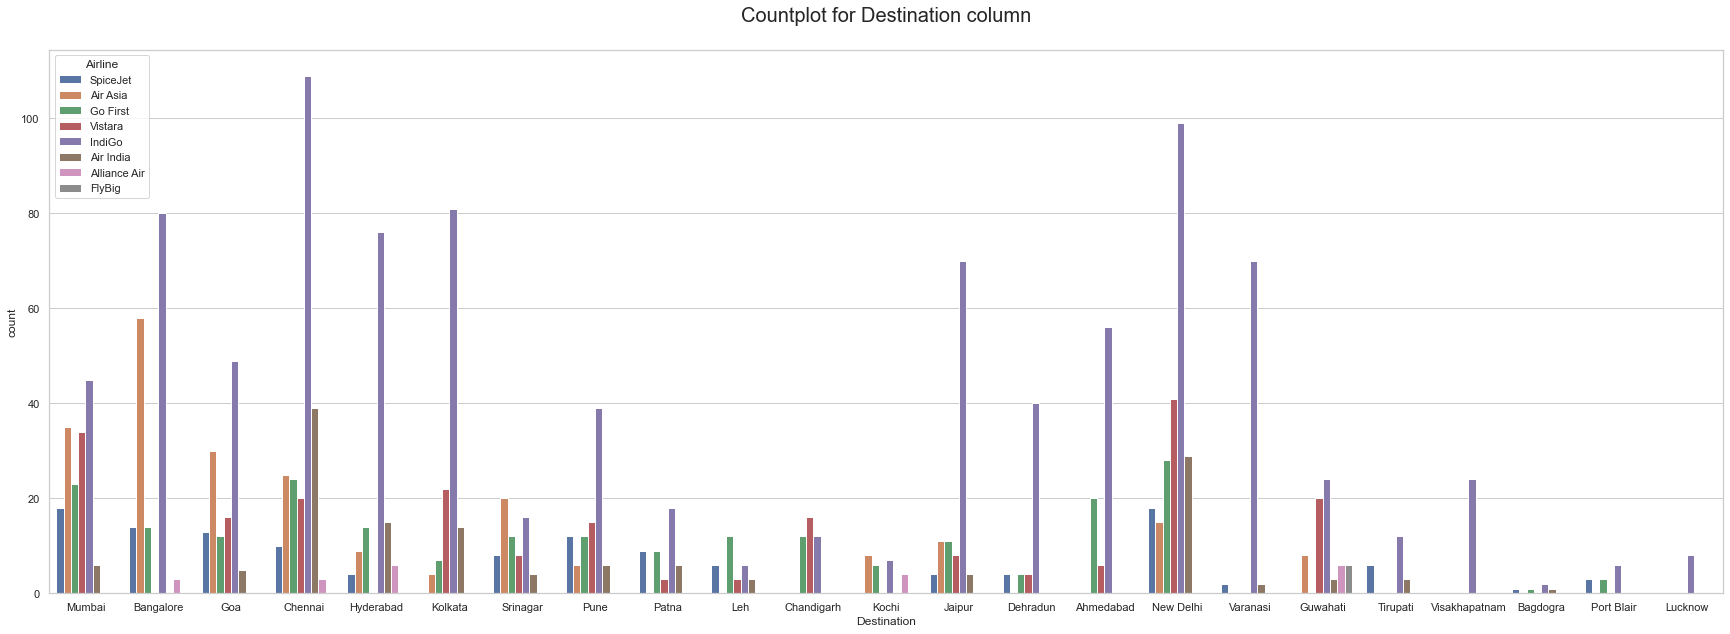

In [35]:
x = "Source"
plt.figure(figsize=(18,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

x = "Destination"
plt.figure(figsize=(30,10))
sns.countplot(x = x, hue = "Airline", data = df)
plt.title(f"Countplot for {x} column\n", fontsize = 20)
plt.show()

- Checking out the Source place details for each and every airline we can see that Mumbai city has the highest number of departure flights for Indigo airlines
- Looking at the Destination place details for each and every airline we can see that Chennai city has the highest number of arrival flights for Indigo airlines
- Overall I can notice that Indigo flights do quite well and can be used for arrival and departure to and from any location in India

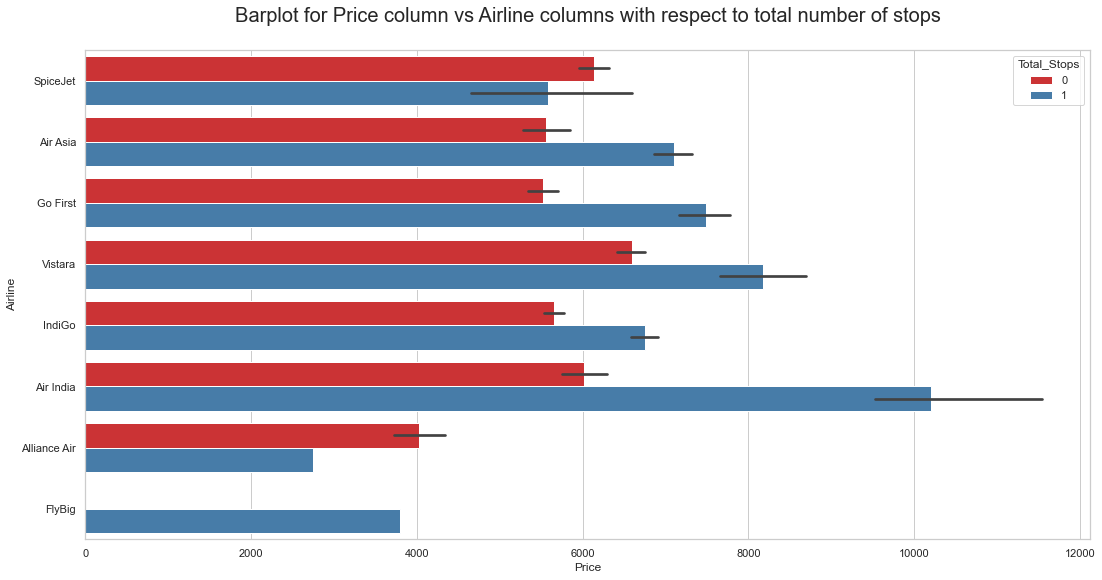

In [36]:
x = "Price"
y = "Airline"

plt.figure(figsize=(18,9))
sns.barplot(x=df[x], y=df[y], hue=df['Total_Stops'], palette="Set1")
plt.title(f"Barplot for {x} column vs {y} columns with respect to total number of stops\n", fontsize = 20)
plt.show()

- Spicejet has the maximum non stop flight
- Air India has the maximum no of 1 stop flights

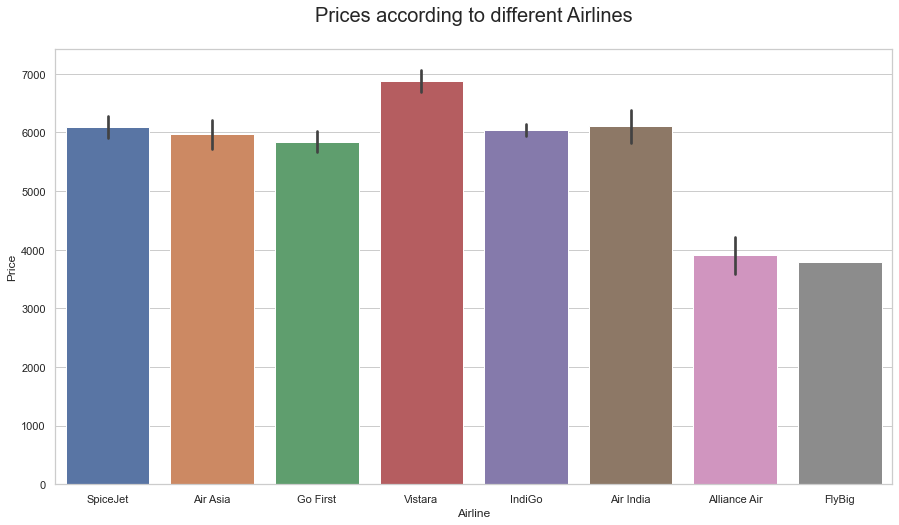

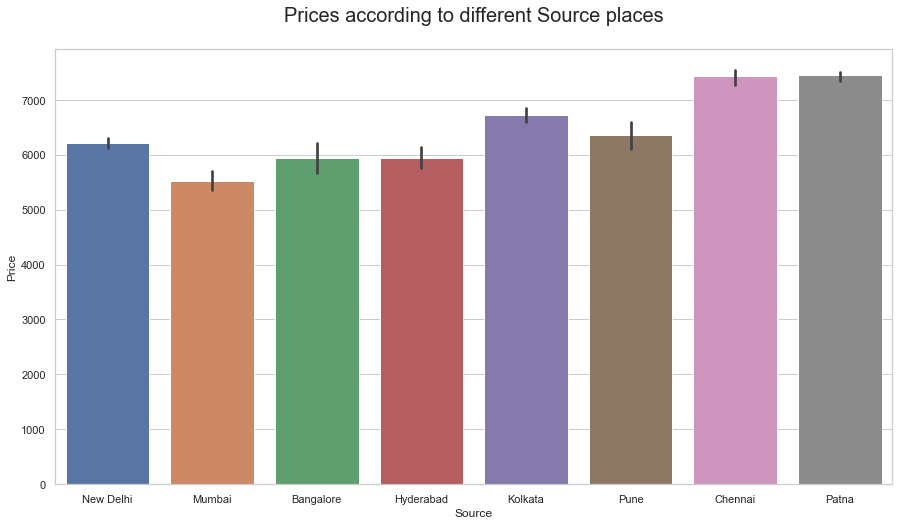

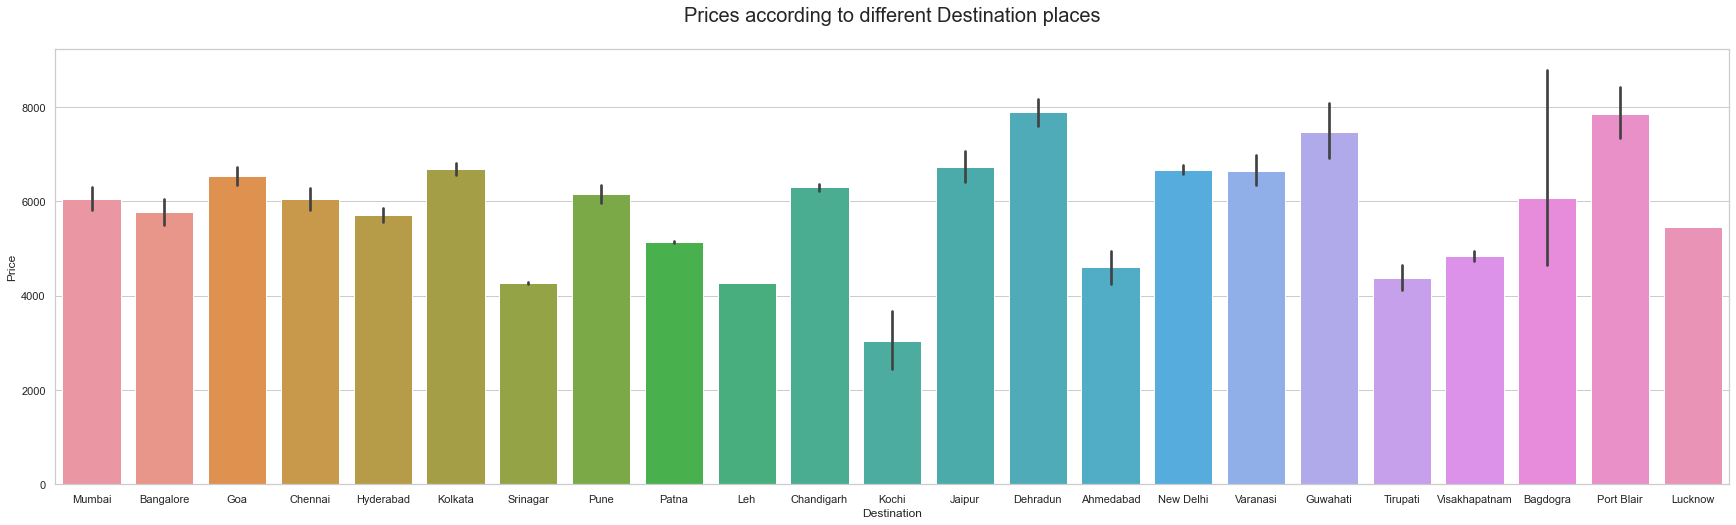

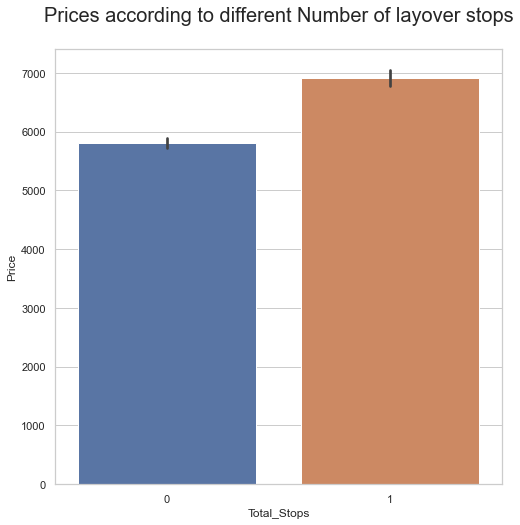

In [37]:
y = "Price"

x = "Airline"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Airlines\n", fontsize = 20)
plt.show()

x = "Source"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Source places\n", fontsize = 20)
plt.show()

x = "Destination"
plt.figure(figsize = (30,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Destination places\n", fontsize = 20)
plt.show()

x = "Total_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Prices according to different Number of layover stops\n", fontsize = 20)
plt.show()

- Airfares in Vistara and Air India are pretty high when compared to other airlines
- Flight prices when departing from cities like Chennai and Patna have higher price range but the others are around the similar range a bit lesser in pricing but not providing a huge difference as such
- Similarly prices when arriving in cities Portblair and Dheradun have high price range
- When we consider the layovers for pricing situtation then obviously direct flights are cheaper when compared to flights that have 1 or more stops

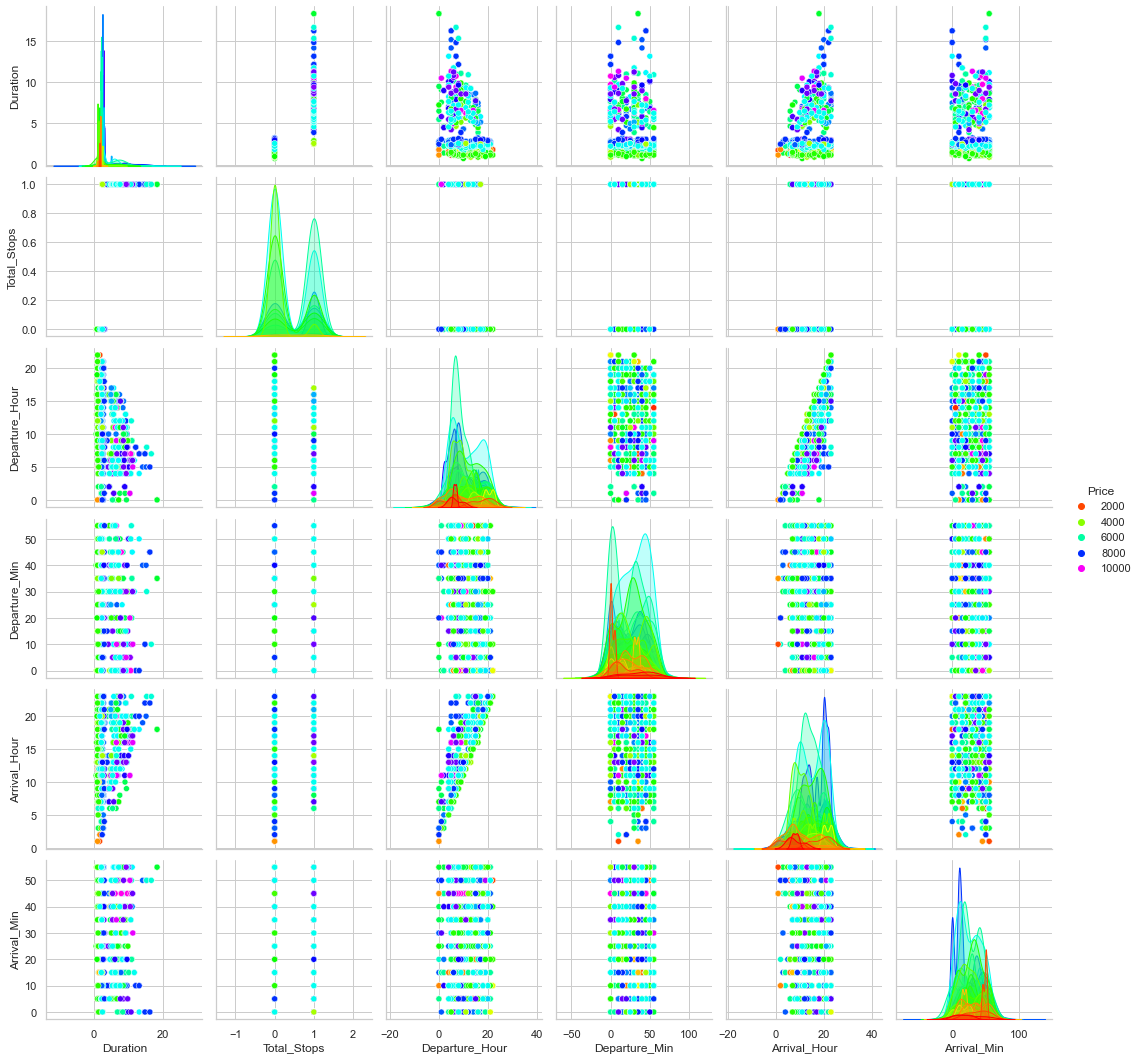

In [38]:
sns.pairplot(df,hue="Price",palette="hsv")
plt.show()

- This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.
- Here we can observe the correaltion between the features and on the diagonal we can notice the distribution plot which shows whether the column has skewness or not.

### Outliers

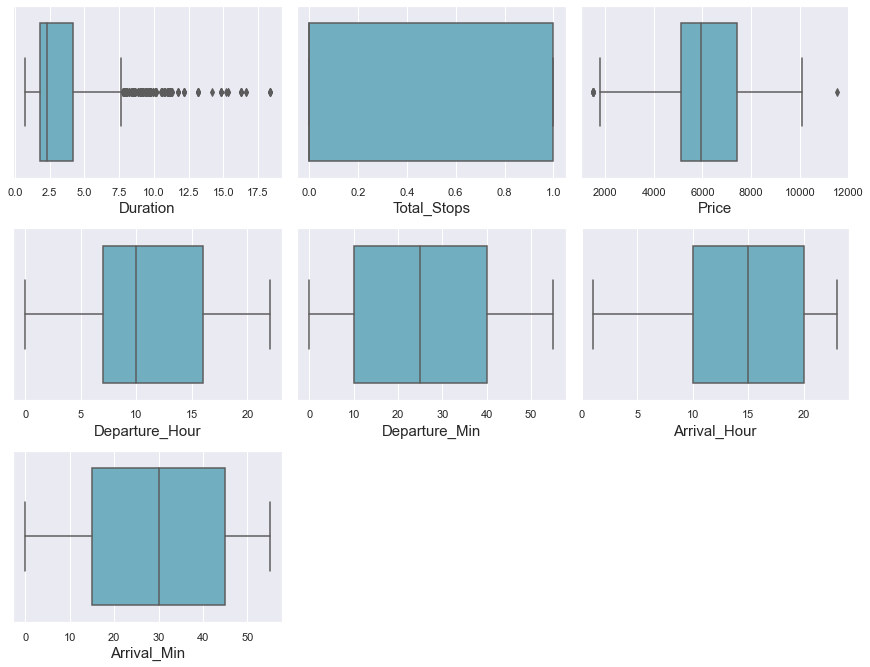

In [39]:
# Identifying the outliers using boxplot
sns.set(style="darkgrid")

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="c")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

- We can see that columns "Duration" have some outliers, let's remove the outliers through zscore method
- We can ignore the outliers present in Price column as this is our target column


In [40]:
# Features containing outliers
df1= df[['Duration']]

In [41]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df1=df[(z<3).all(axis=1)]

In [42]:
# Checking the shape of dataset before and after removing outliers
print("Shape of train dataset before removing outliers:", df.shape)
print("Shape of train dataset after removing outliers:", new_df1.shape)

Shape of train dataset before removing outliers: (1918, 11)
Shape of train dataset after removing outliers: (1892, 11)


In [43]:
# Let's check the the data loss
data_loss = (1918-1892)/1918*100
data_loss

1.3555787278415017

Now we have removed the outliers.

In [44]:
df=new_df1.copy() # Reassigning the changed dataframe name to our original dataframe name

### Skewness

In [45]:
# Checking the skewness
df.skew()

Duration          1.566650
Total_Stops       1.162146
Price            -0.235520
Departure_Hour    0.146984
Departure_Min     0.053151
Arrival_Hour     -0.176923
Arrival_Min      -0.054234
dtype: float64

We can find the skewness in Duration and Total_Stops column, Let's remove skewness of Duration column only

##### Removing skewness using yeo-johnson method

In [46]:
# Removing skewness using yeo-johnson  method to get better prediction
skew1 = ['Duration']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [47]:
df[skew1] = scaler.fit_transform(df[skew1].values)
df[skew1].head()

Duration
0 -0.264616
1 -0.188884
2 -0.117113
3  1.171871
4  1.317720

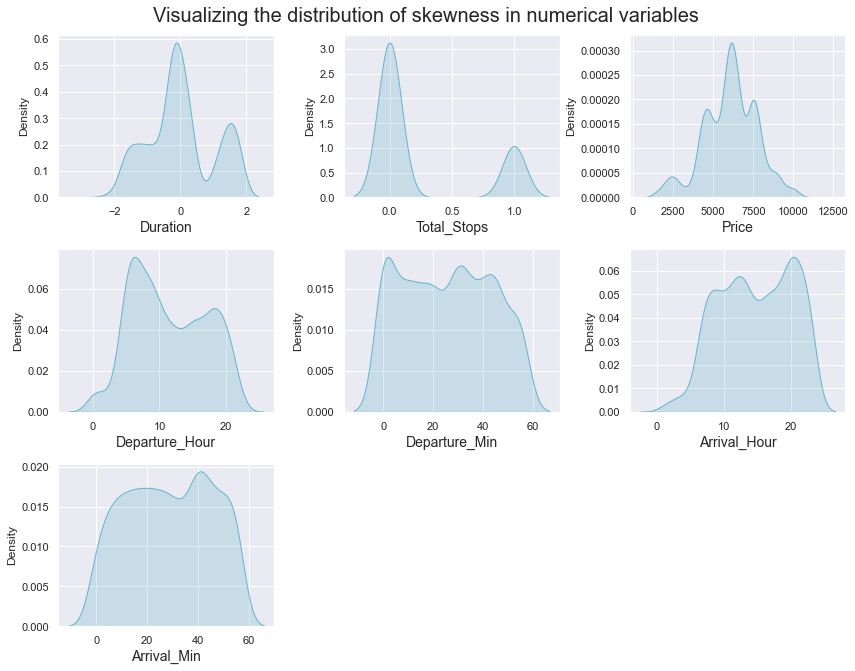

In [48]:
# Checking how the data has been distriubted 
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for column in numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="c", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

### Encoding the categorical columns using Label Encoder Method

In [49]:
# Converting categorical data into numerical using Label Encoder method
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [50]:
# Displaying the categorical columns after encoding 
df[categorical_col].head()

Airline  Source  Destination  Meal_Availability
0        6       5           14                  2
1        6       5           14                  2
2        6       5           14                  2
3        0       5           14                  2
4        0       5           14                  2

### Correlation

In [51]:
# Checking the correlation between features and the target
cor = df.corr()
cor

Airline    Source  Destination  Duration  Total_Stops  \
Airline            1.000000 -0.040629     0.087915  0.062235     0.072200   
Source            -0.040629  1.000000    -0.008351  0.070096    -0.070378   
Destination        0.087915 -0.008351     1.000000 -0.049040    -0.038764   
Duration           0.062235  0.070096    -0.049040  1.000000     0.819575   
Total_Stops        0.072200 -0.070378    -0.038764  0.819575     1.000000   
Meal_Availability  0.053831 -0.023150     0.007452  0.033046     0.017281   
Price              0.123916  0.017525     0.001225  0.604872     0.288632   
Departure_Hour    -0.032003  0.004524    -0.062935 -0.249803    -0.284065   
Departure_Min     -0.051961  0.025766    -0.016212 -0.086910    -0.080965   
Arrival_Hour      -0.012792  0.001370    -0.090112  0.161159     0.124742   
Arrival_Min        0.018188 -0.092544     0.035645 -0.000475     0.002455   

                   Meal_Availability     Price  Departure_Hour  Departure_Min  \
Airline                     0.053831  0.123916       -0.032003      -0.051961   
Source                     -0.023150  0.017525        0.004524       0.025766   
Destination                 0.007452  0.001225       -0.062935      -0.016212   
Duration                    0.033046  0.604872       -0.249803      -0.086910   
Total_Stops                 0.017281  0.288632       -0.284065      -0.080965   
Meal_Availability           1.000000  0.046928       -0.014272       0.006680   
Price                       0.046928  1.000000       -0.070093      -0.074915   
Departure_Hour             -0.014272 -0.070093        1.000000      -0.052972   
Departure_Min               0.006680 -0.074915       -0.052972       1.000000   
Arrival_Hour               -0.004950  0.130355        0.891838      -0.038688   
Arrival_Min                 0.026285  0.046131        0.033399      -0.099695   

                   Arrival_Hour  Arrival_Min  
Airline               -0.012792     0.018188  
Source                 0.001370    -0.092544  
Destination           -0.090112     0.035645  
Duration               0.161159    -0.000475  
Total_Stops            0.124742     0.002455  
Meal_Availability     -0.004950     0.026285  
Price                  0.130355     0.046131  
Departure_Hour         0.891838     0.033399  
Departure_Min         -0.038688    -0.099695  
Arrival_Hour           1.000000    -0.013030  
Arrival_Min           -0.013030     1.000000

This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

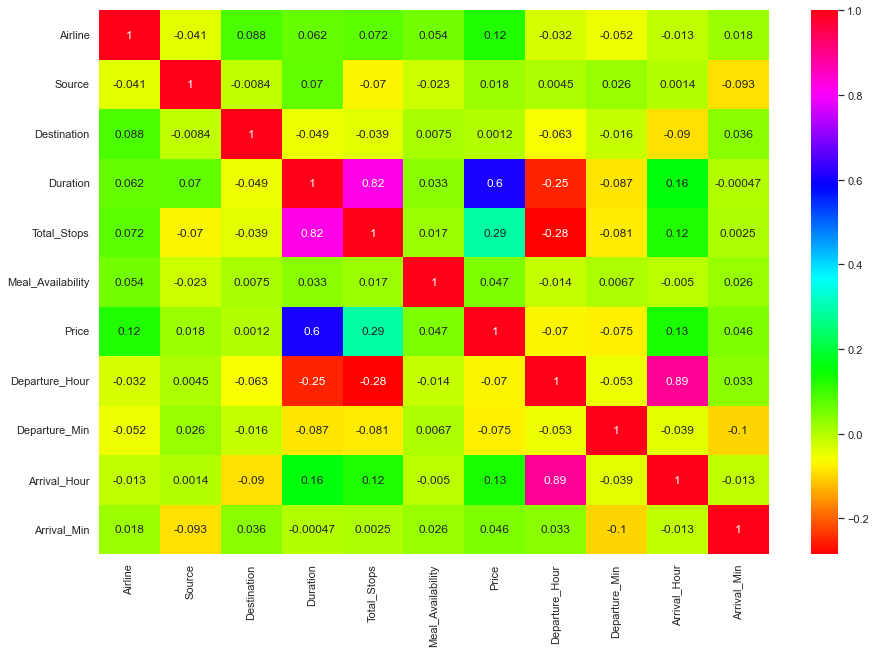

In [52]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='hsv',annot=True)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other

In [53]:
cor['Price'].sort_values(ascending=False)

Price                1.000000
Duration             0.604872
Total_Stops          0.288632
Arrival_Hour         0.130355
Airline              0.123916
Meal_Availability    0.046928
Arrival_Min          0.046131
Source               0.017525
Destination          0.001225
Departure_Hour      -0.070093
Departure_Min       -0.074915
Name: Price, dtype: float64

Here we can notice the positive and negative correlation between features and label in the descending order.

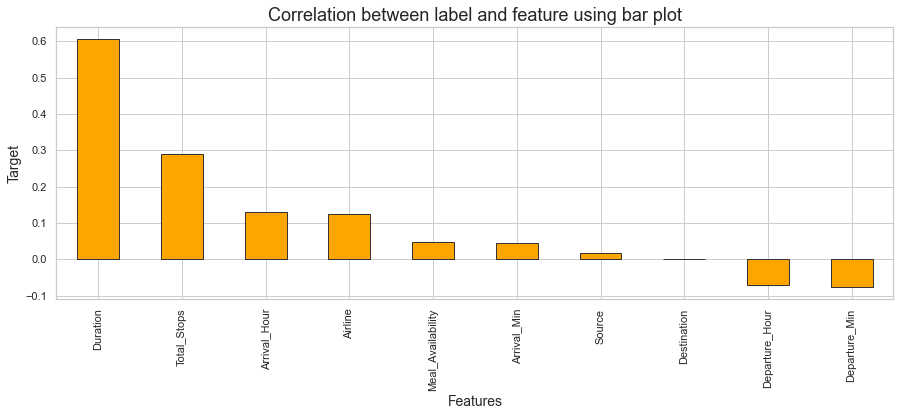

In [54]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='orange',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive and negative correlation between the label and features. Here the column "Destination" has less correlation with the label compared to other features.

### Separating the independent and target variables into x and y

In [55]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [56]:
# Dimension of x and y
x.shape, y.shape

((1892, 10), (1892,))

#### Scaling data with standard scaler

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Airline    Source  Destination  Duration  Total_Stops  Meal_Availability  \
0  0.840046  0.921665     0.662142 -0.264616    -0.575723           0.459065   
1  0.840046  0.921665     0.662142 -0.188884    -0.575723           0.459065   
2  0.840046  0.921665     0.662142 -0.117113    -0.575723           0.459065   
3 -2.069994  0.921665     0.662142  1.171871     1.736947           0.459065   
4 -2.069994  0.921665     0.662142  1.317720     1.736947           0.459065   

   Departure_Hour  Departure_Min  Arrival_Hour  Arrival_Min  
0        1.191973       1.664293      1.164743    -1.414363  
1       -0.783134      -0.319319     -1.053183     0.374589  
2        1.371529       1.097546      1.349570    -1.414363  
3        0.294197      -1.452811      0.610262    -0.519887  
4       -0.603579      -1.452811     -0.129047    -1.414363

## Modeling

##### Finding the Best Random State and Accuracy

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV

In [59]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9904734806593201  on Random_state  16


Here we are getting accuracy score of 99.04% with Random state 16

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

## Feature Importance

In [61]:
# Lets chkeck the feature importance using Random Forest Regressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

Importance
Features                     
Duration                0.598
Destination             0.149
Source                  0.135
Arrival_Hour            0.026
Airline                 0.023
Departure_Hour          0.020
Total_Stops             0.019
Arrival_Min             0.016
Departure_Min           0.013
Meal_Availability       0.001

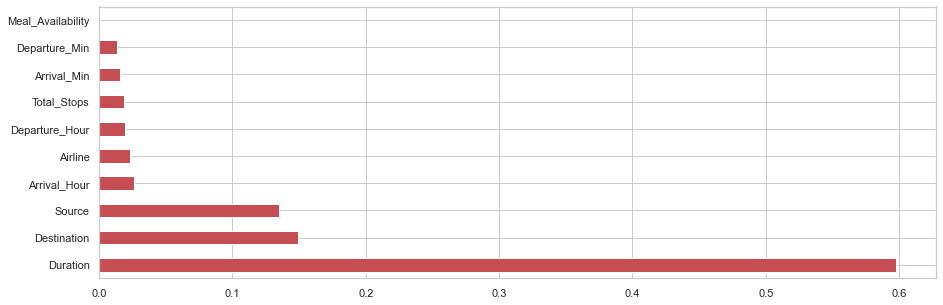

In [62]:
plt.figure(figsize=(15,5))
importances=pd.Series(RFR.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="r")
plt.show()

Here with the help of RandomForestRegressor we are able to list down the importance given to a column as per it's involvement in predicting our label. Here the column "Duration"contributing more for prediction which means this feature is important for the predictions

## Decision Tree Regressor

R2_Score: 99.8541955285033
Mean Absolute Error: 6.498239436619718
Mean Squared Error: 3976.8292253521126
Root Mean Squared Error: 63.06210609670528

Cross Validation Score: 97.5360310924841

R2 Score - Cross Validation Score is 2.3181644360192024


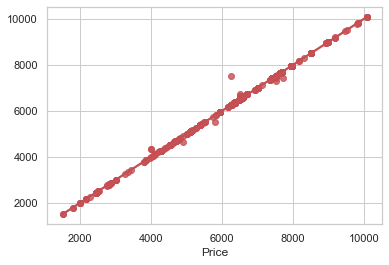

In [63]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100    
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# Cross Validation Score
cv_score = (cross_val_score(DTR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicted values
sns.regplot(y_test,predDTR,color="r")
plt.show()

## Random Forest Regressor

R2_Score: 99.01182533998025
Mean Absolute Error: 77.759735915493
Mean Squared Error: 26952.546978697195
Root Mean Squared Error: 164.17230880601392

Cross Validation Score: 97.87160393843746

R2 Score - Cross Validation Score is 1.1402214015427887


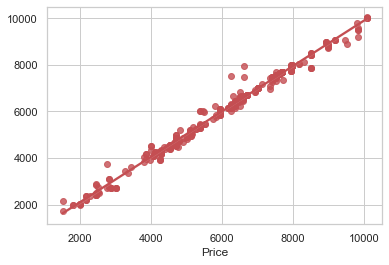

In [64]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR))) 

# Cross Validation Score
cv_score = (cross_val_score(RFR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,color="r")
plt.show()

## Extra Trees Regressor

R2_Score: 99.63897667403235
Mean Absolute Error: 25.79383802816901
Mean Squared Error: 9846.941585563378
Root Mean Squared Error: 99.23175694082705

Cross Validation Score: 98.43948078587778

R2 Score - Cross Validation Score is 1.1994958881545728


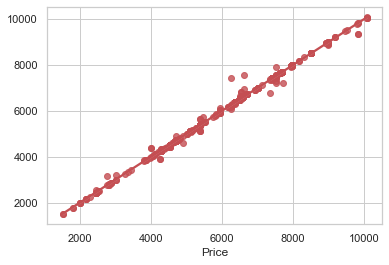

In [65]:
# Checking R2 score for Extra Trees Regressor
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)

# prediction
predXT=XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT))) 

# Cross Validation Score
cv_score = (cross_val_score(XT, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXT,color="r")
plt.show()

## GradientBoosting Regressor

R2_Score: 91.16187302562585
Mean Absolute Error: 322.6824473092479
Mean Squared Error: 241060.65670187326
Root Mean Squared Error: 490.97928337341614

Cross Validation Score: 88.42177342610509

R2 Score - Cross Validation Score is 2.740099599520761


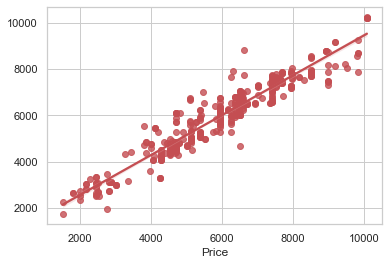

In [66]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB))) 

# Cross Validation Score
cv_score = (cross_val_score(GB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)
# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="r")
plt.show()

## Extreme Gradient Boosting Regressor (XGB)

R2_Score: 99.63275731191581
Mean Absolute Error: 27.428464003012213
Mean Squared Error: 10016.575210473775
Root Mean Squared Error: 100.0828417386006

Cross Validation Score: 98.72992050426724

R2 Score - Cross Validation Score is 0.9028368076485691


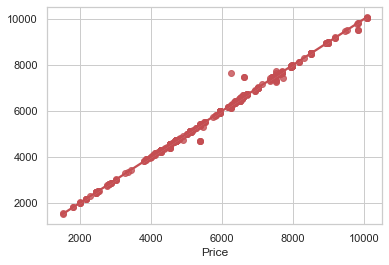

In [67]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb
XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
R2_score = r2_score(y_test,predXGB)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXGB))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXGB))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXGB))) 

# Cross Validation Score
cv_score = (cross_val_score(XGB, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="r")
plt.show()

## Bagging Regressor

R2_Score: 98.38070354446448
Mean Absolute Error: 83.36338028169014
Mean Squared Error: 44166.44704225352
Root Mean Squared Error: 210.15814769419129

Cross Validation Score: 97.37953981287149

R2 Score - Cross Validation Score is 1.001163731592996


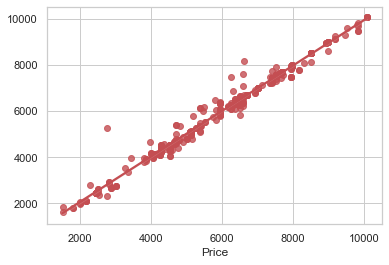

In [68]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR))) 
# Cross Validation Score
cv_score = (cross_val_score(BR, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="r")
plt.show()

## KNeighbors Regressor

R2_Score: 65.12732879578095
Mean Absolute Error: 624.5369718309859
Mean Squared Error: 951155.0406338029
Root Mean Squared Error: 975.2717778310838

Cross Validation Score: 61.76168640728162

R2 Score - Cross Validation Score is 3.3656423884993316


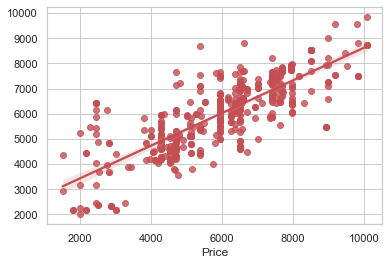

In [69]:
# Checking R2 score for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
R2_score = r2_score(y_test,predknn)*100      # R squared score
print('R2_Score:',R2_score) 
# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predknn))    
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predknn))     
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predknn))) 

# Cross Validation Score
cv_score = (cross_val_score(knn, x, y, cv=5).mean())*100
print("\nCross Validation Score:", cv_score)

# Difference of R2 score minus cv scores
Difference = R2_score - cv_score
print("\nR2 Score - Cross Validation Score is", Difference)

# Visualizing the predicteed values
sns.regplot(y_test,predknn,color="r")
plt.show()

All models have performed very well.From the difference between R2 score and Cross Validation score, it can be seen that the XGB Regressor has least difference and low evaluation metrics compared to other models. That is XGBoost as a regression gave the best R2 score, MAE, MSE and RMSE values. So we can conclude that XGB Regressor as our best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

## Hyper Parameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
#XGB Regressor
parameters = {'n_estimators' : [50,100,150,200],
              'learning_rate':np.arange(0.05,0.5,0.05),
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10]}

In [72]:
GCV=GridSearchCV(xgb(),parameters,cv=5)

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [74]:
# Finding best parameters
GCV.best_params_

{'gamma': 0.1,
 'learning_rate': 0.15000000000000002,
 'max_depth': 10,
 'n_estimators': 200}

R2_Score: 99.76479925175724
Mean absolute error: 18.282492839114767
Mean squared error: 6415.120193743029
Root Mean Squared error: 80.09444546123676


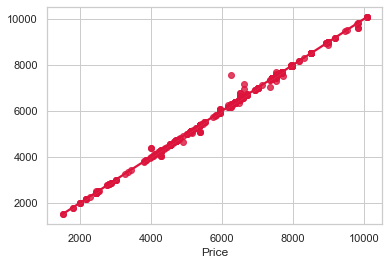

In [75]:
# Creating final model
Flight_price_model = xgb(gamma=0.1, learning_rate=0.15000000000000002, max_depth=10, n_estimators=200)

# Prediction
Flight_price_model.fit(x_train, y_train)
pred = Flight_price_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)

# Metric Evaluation
print('Mean absolute error:',metrics.mean_absolute_error(y_test, pred))
print('Mean squared error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

# Visualizing the predicted values
sns.regplot(y_test,pred,color="crimson")
plt.show()

- We have successfully incorporated the hyper parameter tuning using best parameters of XGB Regressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 99.76% which is very good.
- From the graph we can observe how our final model is mapping. In the graph we can observe the best fit line which is our actual dataset and the dots are the predictions that our best final model has given.

## Saving the Final model

In [76]:
# Saving the model using joblib library 
import joblib
joblib.dump(Flight_price_model,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']

#### Loading the saved model and predicting Flight price

In [77]:
# Loading the saved model
Model=joblib.load("FlightPricePrediction.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 7413.2227,  8948.91  ,  4687.039 ,  7948.634 ,  6716.9287,
        5259.9365,  8992.24  ,  7634.802 ,  7422.9927,  6324.0684,
        7425.035 ,  5942.671 ,  7489.882 ,  5983.6226,  5952.1357,
        7423.9985,  2870.1104,  7948.867 ,  2521.991 ,  8515.992 ,
        4687.152 ,  6506.719 ,  8992.05  ,  6506.929 ,  3422.9993,
        5373.7925,  7564.928 ,  9831.951 ,  4277.8354,  6506.5566,
        9528.819 ,  6372.468 ,  7412.949 ,  8991.898 ,  5952.1816,
        7964.189 ,  4668.0107,  4686.0493,  7684.002 ,  5114.6685,
        6716.8877,  8885.671 ,  5371.893 ,  4686.9653,  5935.6216,
        3814.2585,  7537.4463,  6577.97  ,  5373.9697,  4274.8687,
        6243.487 ,  5932.186 ,  5944.0347,  2433.121 ,  7423.7046,
        7693.04  ,  7696.2144,  4273.9585,  3847.1716,  7316.4004,
        8516.023 ,  6550.0815,  6364.2495,  4687.1426,  9193.764 ,
        5103.1196,  7634.982 ,  4534.053 ,  5444.9   ,  5931.2656,
        7422.7866,  5949.9736,  6480.3853,  5943.4097,  4261.9

In [78]:
Predicted_Flight_Ticket_Price = pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"]).T
Predicted_Flight_Ticket_Price

Predicted  Actual
0    7413.222656  7413.0
1    8948.910156  8949.0
2    4687.039062  4687.0
3    7948.633789  7949.0
4    6716.928711  6717.0
..           ...     ...
563  6370.316406  6364.0
564  7570.982422  7513.0
565  5954.242188  5954.0
566  6926.932617  6927.0
567  5941.911133  5942.0

[568 rows x 2 columns]

Using regression model, we have got the predicted price of the flight tickets. From the above output we can observe that predicted values are almost near to the actual values.

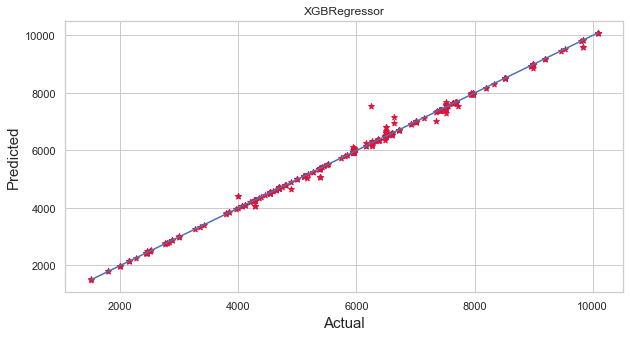

In [79]:
# Visualizing actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson',marker="*")
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

The graph shows how our final model is mapping. The plot gives the linear relation between predicted and actual price of the used cars. The blue line is the best fitting line which gives the actual values/data and red dots gives the predicted values/data.

In [80]:
# Saving the predicted car price values in csv file
Predicted_Flight_Ticket_Price.to_csv("PredictedFlightTicketPrice.csv",index=False)

## Conclusion

In this project we have scraped the flight data from airline webpages. Then the comma separated value file is loaded into a data frame. Looking at the data set we understand that there are some features needs to be processed like converting the data types and get the actual value from the string entries from the time related columns. After the data is been processed I have done some EDA to understand the relation among features and the target variable. Features like flight duration, number of stops during the journey and the availability of meals are playing major role in predicting the prices of the flights

As we have seen, the prediction is showing a similar relationship with the actual price from the scrapped data set. This means the model predicted correctly and it could help airlines by predicting what prices they can maintain. It could also help customers to predict future flight prices and plan the journey accordingly because it is difficult for airlines to maintain prices since it changes dynamically due to different conditions. Hence by using Machine Learning techniques we can solve this problem.

The above research will help our client to study the latest flight price market and with the help of the model built he can easily predict the price ranges of the flight, and also will helps him to understand Based on what factors the fight price is decided.